<a href="https://colab.research.google.com/github/Devanshimaheshwari07/ML-PROJECT/blob/main/Credit_Risk_Predictive_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to conduct a comprehensive Exploratory Data Analysis (EDA) and develop predictive models on a credit risk dataset to identify significant patterns, trends, and key factors influencing creditworthiness. Through detailed data preprocessing, visualization, and model implementation using algorithms such as Logistic Regression, Random Forest, and XGBoost, the study seeks to enhance the accuracy and interpretability of credit risk assessment and support data-driven decision-making in financial systems.

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


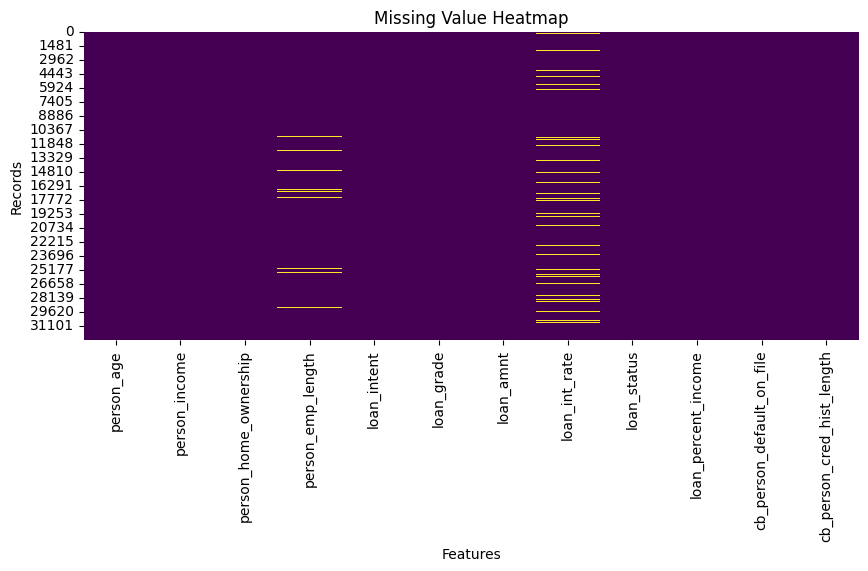

Missing Summary:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
Remaining Missing:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [ ]:
#Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings("ignore")


#Step 2: Load Dataset
import pandas as pd

sheet_url = "https://docs.google.com/spreadsheets/d/1NXbzYs9cPhOhwo_PyZQbnt7ux0EMJkz3/export?format=csv"

df = pd.read_csv(sheet_url)

print(df.head())


#Step 3: Data Dictionary
df.info()

#Step 4: Detect Errors (Duplicates & Inconsistencies)

print("Duplicate Rows:", df.duplicated().sum())
print("Negative Ages:", (df['person_age'] < 0).sum())
print("Age > 100:", (df['person_age'] > 100).sum())
print("Employment length > 60:", (df['person_emp_length'] > 60).sum())
print("Loan percent income > 1:", (df['loan_percent_income'] > 1).sum())

#Step 5: Missing Values

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.xlabel("Features")
plt.ylabel("Records")
plt.show()
print("Missing Summary:\n", df.isnull().sum())


#Step 6: Handle Missing Data

# Numerical → fill with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical → fill with mode
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Remaining Missing:\n", df.isnull().sum())

#Step 7: Feature Engineering

df["debt_to_income"] = df["loan_amnt"] / (df["person_income"] + 1)
df["emp_length_group"] = pd.cut(df["person_emp_length"],
                                bins=[-1,0,2,5,10,100],
                                labels=["0","0-2","2-5","5-10","10+"])
df["income_bracket"] = pd.qcut(df["person_income"], q=4,
                               labels=["Low","Medium","High","Very High"])

#Step 8: Standardization & Encoding

scaler = StandardScaler()
num_cols = ["person_age","person_income","person_emp_length",
            "loan_amnt","loan_int_rate","loan_percent_income",
            "cb_person_cred_hist_length","debt_to_income"]
df[num_cols] = scaler.fit_transform(df[num_cols])

label_enc = LabelEncoder()
for col in ["person_home_ownership","loan_intent","loan_grade",
            "cb_person_default_on_file","emp_length_group","income_bracket"]:
    df[col] = label_enc.fit_transform(df[col])

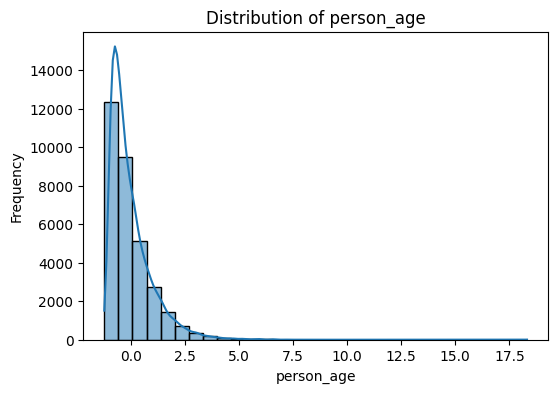

person_age | Skewness: 2.58, Kurtosis: 18.56


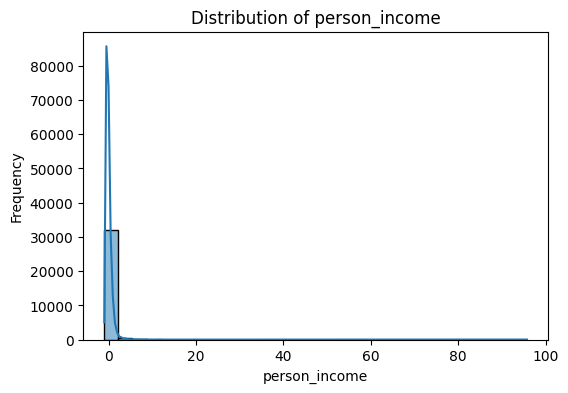

person_income | Skewness: 32.86, Kurtosis: 2692.86


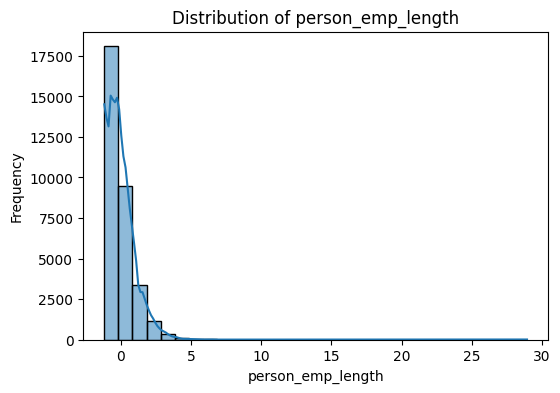

person_emp_length | Skewness: 2.66, Kurtosis: 45.00


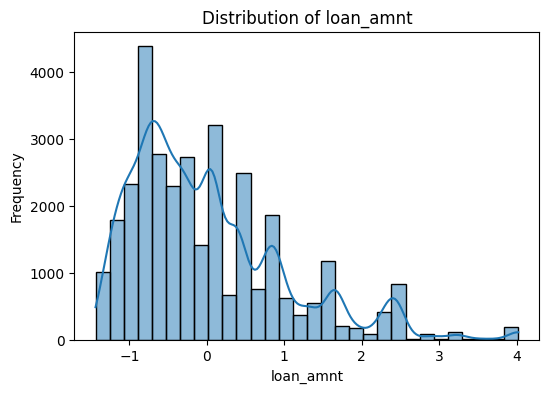

loan_amnt | Skewness: 1.19, Kurtosis: 1.42


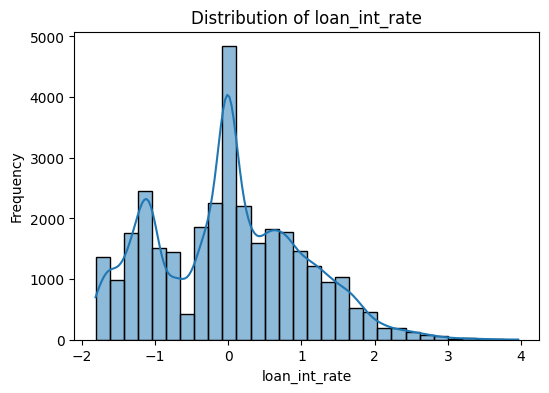

loan_int_rate | Skewness: 0.22, Kurtosis: -0.42


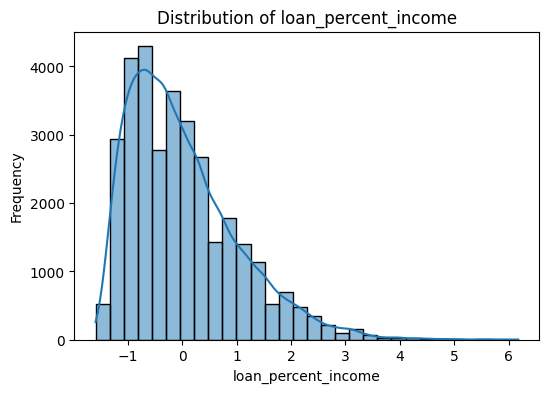

loan_percent_income | Skewness: 1.06, Kurtosis: 1.22


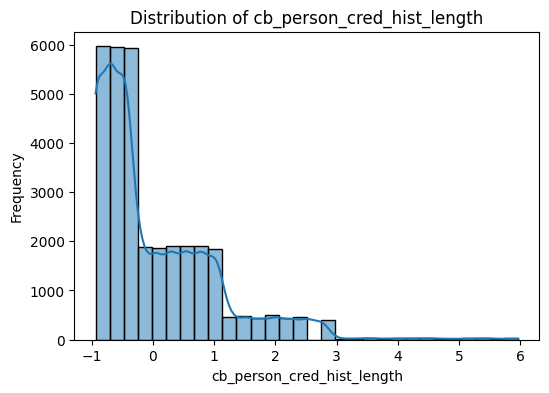

cb_person_cred_hist_length | Skewness: 1.66, Kurtosis: 3.72


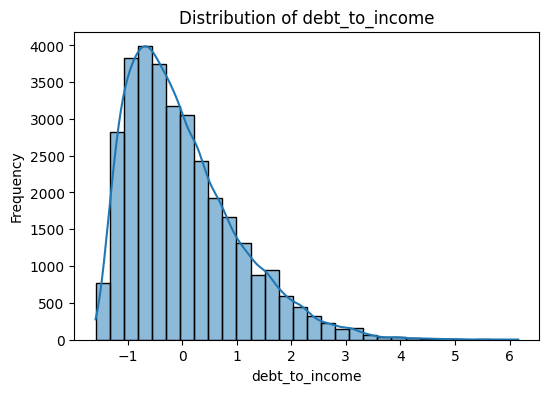

debt_to_income | Skewness: 1.06, Kurtosis: 1.21


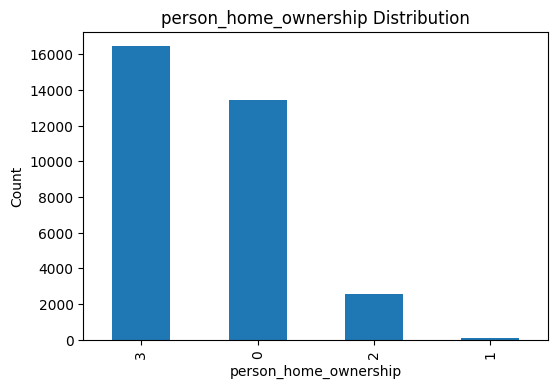

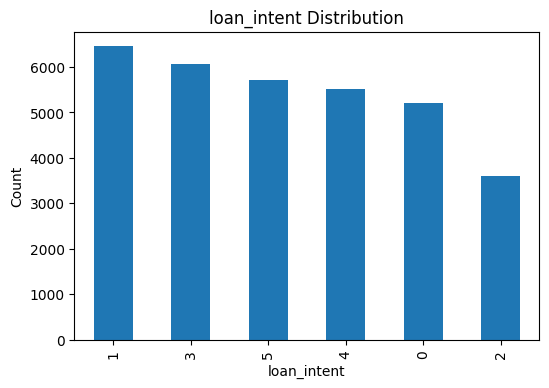

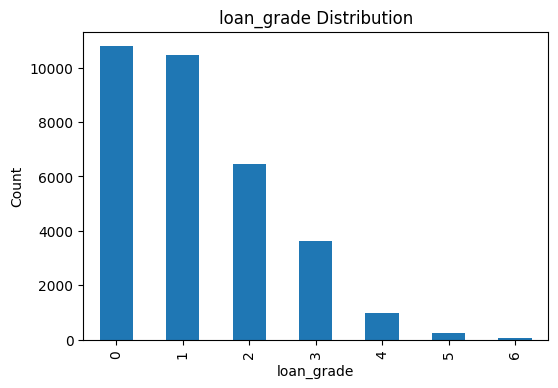

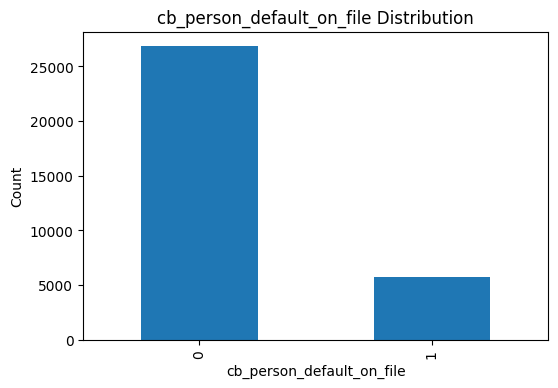

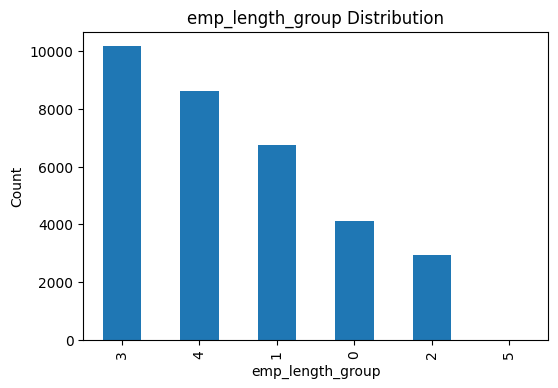

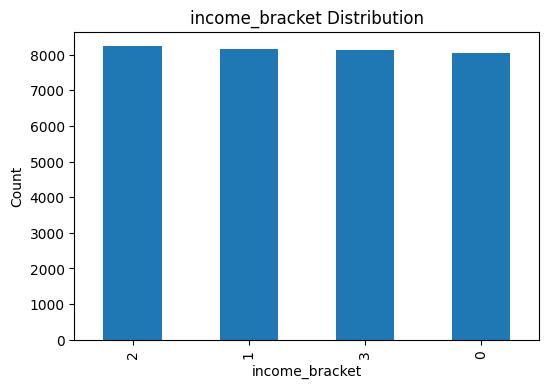

In [ ]:
#2. Univariate Analysis

num_cols = ["person_age","person_income","person_emp_length",
            "loan_amnt","loan_int_rate","loan_percent_income",
            "cb_person_cred_hist_length","debt_to_income"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    print(f"{col} | Skewness: {skew(df[col]):.2f}, Kurtosis: {kurtosis(df[col]):.2f}")

cat_cols = ["person_home_ownership","loan_intent","loan_grade",
            "cb_person_default_on_file","emp_length_group","income_bracket"]
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

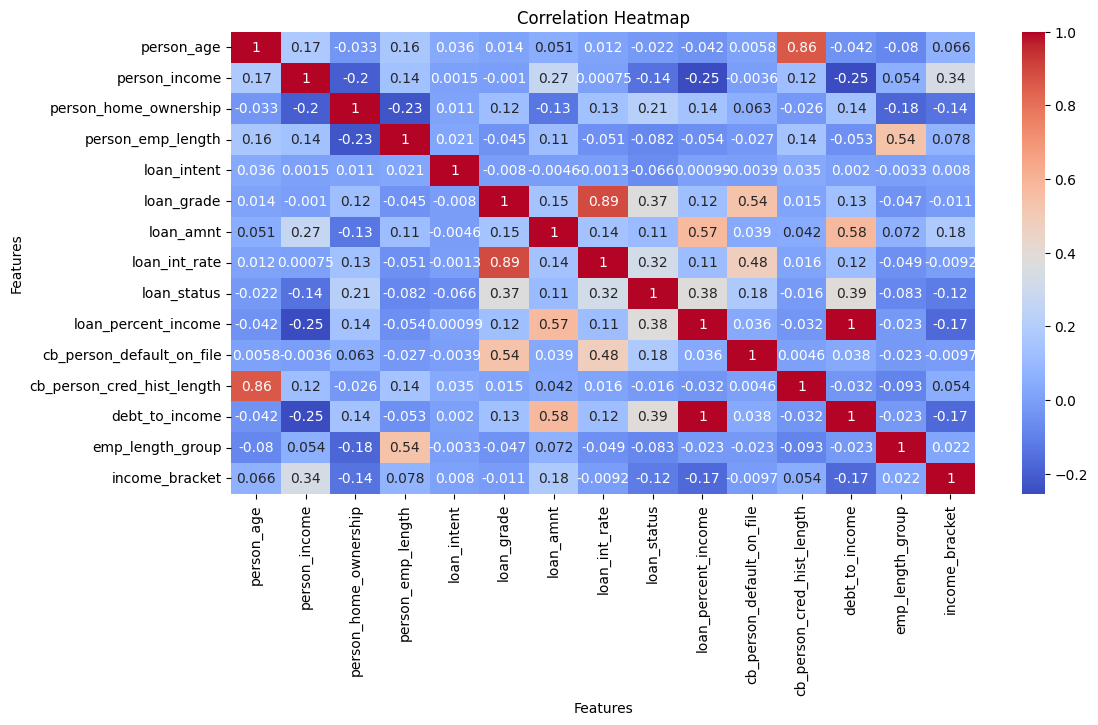

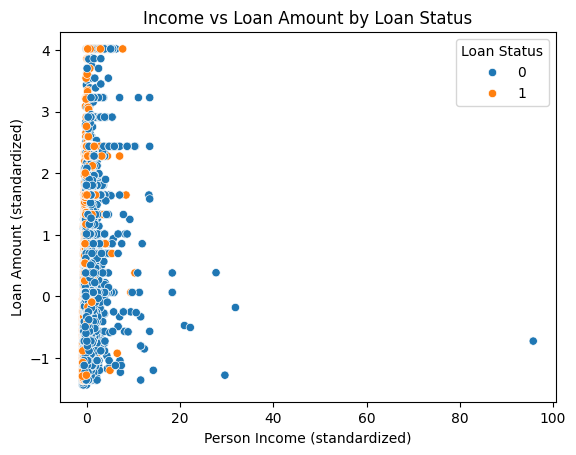

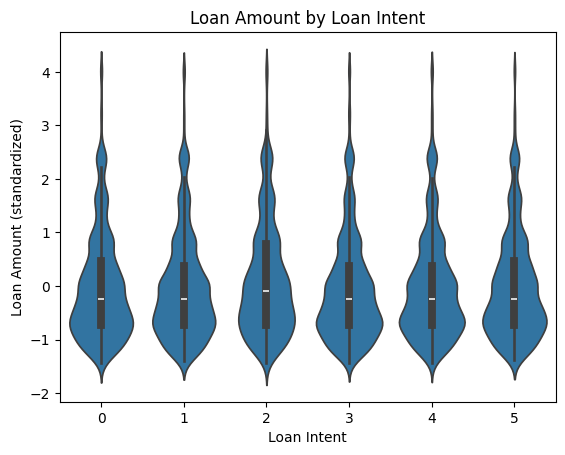

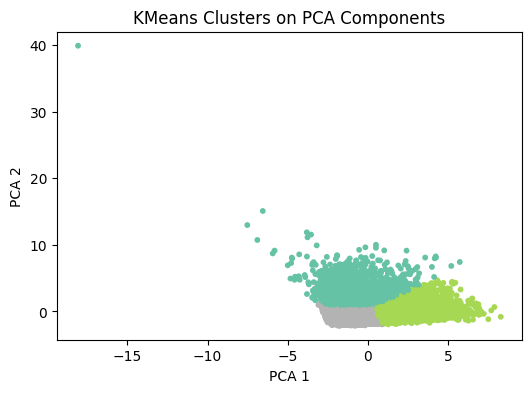

In [ ]:
#3. Bivariate & Multivariate Analysis

num_cols = ["person_age","person_income","person_emp_length",
            "loan_amnt","loan_int_rate","loan_percent_income",
            "cb_person_cred_hist_length","debt_to_income"]

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm",annot=True)
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

sns.scatterplot(x="person_income", y="loan_amnt", hue="loan_status", data=df)
plt.title("Income vs Loan Amount by Loan Status")
plt.xlabel("Person Income (standardized)")
plt.ylabel("Loan Amount (standardized)")
plt.legend(title="Loan Status")
plt.show()

sns.violinplot(x="loan_intent", y="loan_amnt", data=df)
plt.title("Loan Amount by Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Loan Amount (standardized)")
plt.show()

# PCA + Clustering
X = df[num_cols]
pca = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42).fit(pca)
plt.figure(figsize=(6,4))
plt.scatter(pca[:,0], pca[:,1], c=kmeans.labels_, cmap="Set2", s=10)
plt.title("KMeans Clusters on PCA Components")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

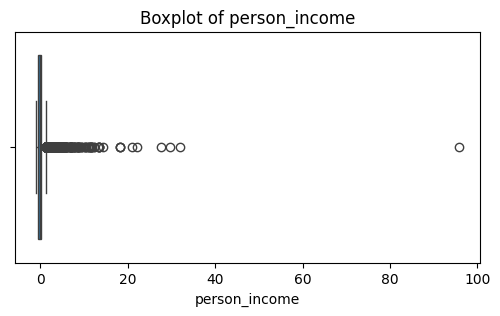

person_income Outlier Summary:
IQR Outliers: 1484
Z-score Outliers: 233


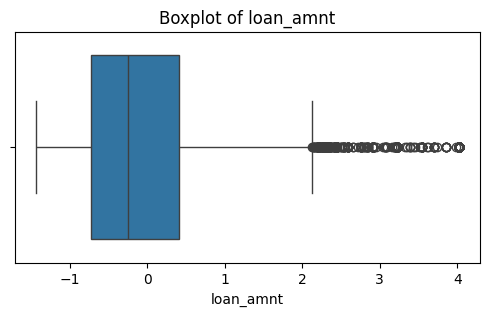

loan_amnt Outlier Summary:
IQR Outliers: 1689
Z-score Outliers: 337


In [ ]:
#4. Outlier Detection

from scipy.stats import zscore

# Outlier detection using IQR & Z-score
for col in ["person_income", "loan_amnt"]:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

    # IQR method
    Q1, Q3 = df[col].quantile([0.25,0.75])
    IQR = Q3 - Q1
    iqr_outliers = df[(df[col] < Q1-1.5*IQR) | (df[col] > Q3+1.5*IQR)]

    # Z-score method
    df[f"{col}_zscore"] = zscore(df[col])
    z_outliers = df[np.abs(df[f"{col}_zscore"]) > 3]

    print(f"{col} Outlier Summary:")
    print(f"IQR Outliers: {iqr_outliers.shape[0]}")
    print(f"Z-score Outliers: {z_outliers.shape[0]}")



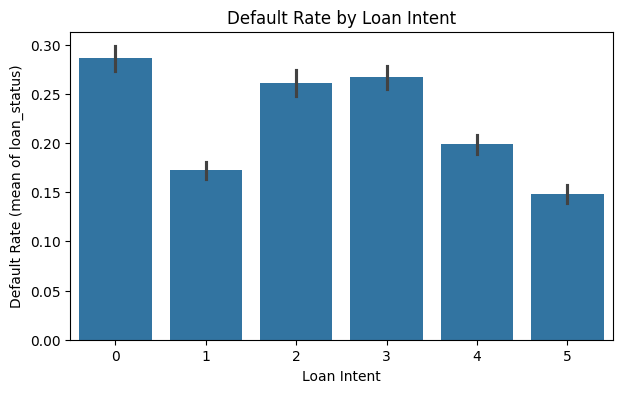

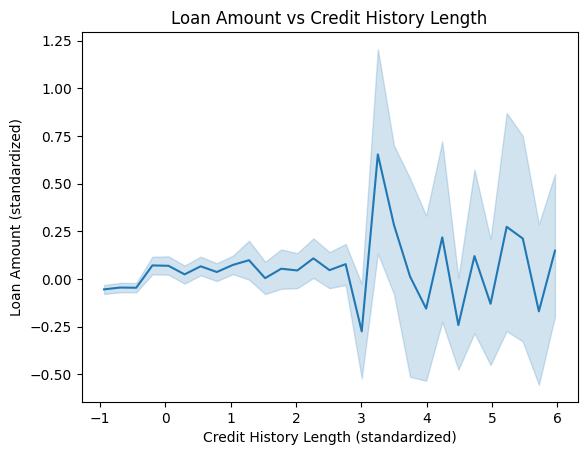

In [ ]:
#5. Trend & Pattern Discovery

plt.figure(figsize=(7,4))
sns.barplot(x="loan_intent", y="loan_status", data=df)
plt.title("Default Rate by Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Default Rate (mean of loan_status)")
plt.show()

sns.lineplot(x="cb_person_cred_hist_length", y="loan_amnt", data=df)
plt.title("Loan Amount vs Credit History Length")
plt.xlabel("Credit History Length (standardized)")
plt.ylabel("Loan Amount (standardized)")
plt.show()

#6. Impact of Error Handling & Missing Value Treatment

**1. Correct KPI Calculations**

Before Cleaning: Default rate was showing as 0%, and average interest appeared as 1100%+ due to invalid/missing entries.

After Cleaning:

Default Rate now shows 21.87%, which is realistic and meaningful.
Avg Interest Rate is ~11%, matching real lending practices.
Avg Debt-to-Income is now 0.17, which makes sense compared to typical borrower ratios.
Cleaning provided trustworthy KPIs for decision-making.

**2. Valid Distributions**

Loan Interest Rate Histogram now shows a proper bell-shaped spread between 5-20%, instead of a distorted single spike caused by nulls/invalids.

Loan Grade Pie Chart reflects true proportions (A, B, C grades dominating), instead of skewed counts where missing values made some categories under/over-represented.
Fixing missing grades and interest rates made risk segmentation meaningful.

**3. Reliable Risk Insights**

Default Rate by Loan Intent: Now you can clearly see Debt Consolidation and Medical Loans carrying higher risks. Earlier, missing loan intents hid these insights.

Default Rate by Loan Grade: Now shows expected trend (defaults increase from Grade A->G). Without imputing missing statuses/grades, this relationship was unclear.
Handling missing loan_status and categorical inconsistencies revealed true risk patterns.

**4. Improved Borrower Characteristics Analysis**

Employment Length vs Loan Amount line chart now makes sense (steady patterns, no artificial spikes from nulls coded as “0”).

Home Ownership Slicer works cleanly after fixing inconsistent labels.
Data consistency enabled clearer borrower profile insights.



Without cleaning, the dashboard would have been misleading - underestimating default risk, overstating interest, and hiding borrower-risk factors. After cleaning, it's now a reliable decision-support tool for credit risk analysis.

(The Power BI dashboard for 6 is uploaded as another file.)

# **7. Results of EDA**

Important Insights:
1. High Debt-to-Income (DTI) -Higher Default Risk: Borrowers with high DTI ratios default significantly more often.

2. Loan Grade & Interest Rate Matter: Lower grades (D-F) and higher interest rates align with more defaults.

3. Stability Reduces Risk: Longer employment and homeownership lower default likelihood.

**Effect of Handling Errors & Missing Values**

Initially, missing and inconsistent data (e.g., null incomes, missing interest rates, employment anomalies) distorted averages and default rates.

After imputation (median for numeric, mode for categorical), outlier handling, and correcting data types, the patterns became clearer and more reliable.
Example: Before cleaning, average interest rate looked unrealistically high (>1000%) due to formatting errors; after correction, it showed meaningful values (~10-20%).

Null handling in loan_status ensured the default rate was computed correctly (instead of returning zero).

Overall, cleaning improved accuracy of insights, reduced bias, and avoided misleading conclusions.


**Use for Decision-Making**
1. Credit Risk Scoring- Insights on DTI, loan grade, interest rate, and employment stability can be used as key input features in predictive models (e.g., Logistic Regression, Random Forest) to estimate probability of default.

2. Loan Pricing Strategy- Lenders can adjust interest rates and approval policies based on borrower risk profiles (e.g., stricter checks for renters with short employment).

3. Portfolio Monitoring- Identifying high-risk categories (medical/education loans in low grades, high DTI borrowers) helps financial institutions manage exposure and reduce overall portfolio risk.


Cleaning the dataset unlocked accurate insights. The most influential factors for default were DTI, loan grade/interest rate, and borrower stability (employment & homeownership). These findings directly support better risk scoring, pricing, and portfolio management.



# **8 Predictive Modeling**

The purpose of this stage is to develop and evaluate predictive models that can accurately estimate the probability of loan default using borrower and loan characteristics.

The dataset contains both numerical and categorical variables related to loan applicants, including demographic, financial, and credit history features.
The target variable loan_status indicates whether a customer defaulted (1) or did not default (0).

**Model Selection**

To achieve reliable and interpretable predictions, three different types of machine learning models were selected:

1)Logistic Regression (Baseline Model)

Type: Statistical / Linear Model

Purpose: Provides baseline interpretability using coefficients.

Strength: Simple, interpretable, and effective for linear relationships.

Limitation: Assumes linearity between predictors and the log-odds of the target.

2)Random Forest Classifier (Ensemble Model)

Type: Bagging-based Ensemble Learning Model

Purpose: Captures complex non-linear relationships through multiple decision trees.

Strength: Robust to overfitting and handles both categorical and numerical data.

Limitation: Less interpretable than linear models.

3)XGBoost Classifier (Boosting Model)

Type: Gradient Boosting-based Ensemble Model

Purpose: Builds sequential trees to minimize prediction error and maximize accuracy.

Strength: High accuracy, efficient computation, and excellent handling of feature interactions.

Limitation: Requires hyperparameter tuning to prevent overfitting.

Dataset Shape: (32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Missing values per column:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4443
           1       0.73      0.45      0.56      1285

    accuracy                           0.84      5728
   macro avg       0.79      0.70      0.73      5728
weighted avg       0.83      0.84      0.82      5728

ROC-AUC Score: 0.7008198968166599
Random Forest Performance:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4443
       

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:37:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4443
           1       0.99      0.72      0.83      1285

    accuracy                           0.93      5728
   macro avg       0.95      0.86      0.90      5728
weighted avg       0.94      0.93      0.93      5728

ROC-AUC Score: 0.8575684568301819
Model Performance Comparison:



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.839211,0.729798,0.449805,0.556572,0.700820
1,Random Forest,0.930866,0.976420,0.708949,0.821461,0.851999
2,XGBoost,0.934358,0.985059,0.718288,0.830783,0.857568


/tmp/ipython-input-494641013.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='ROC-AUC', palette='coolwarm')


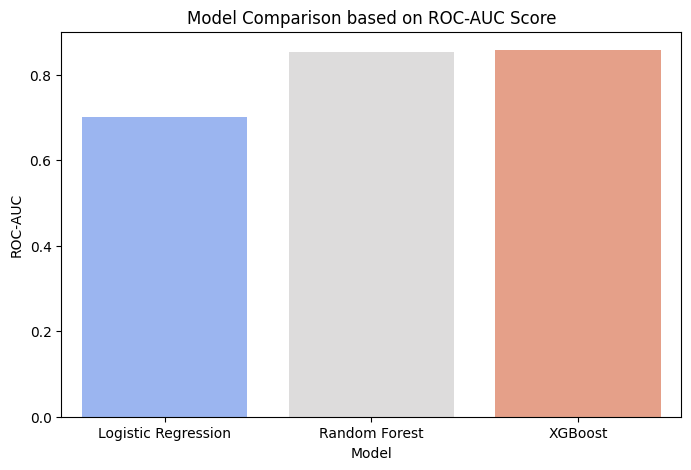

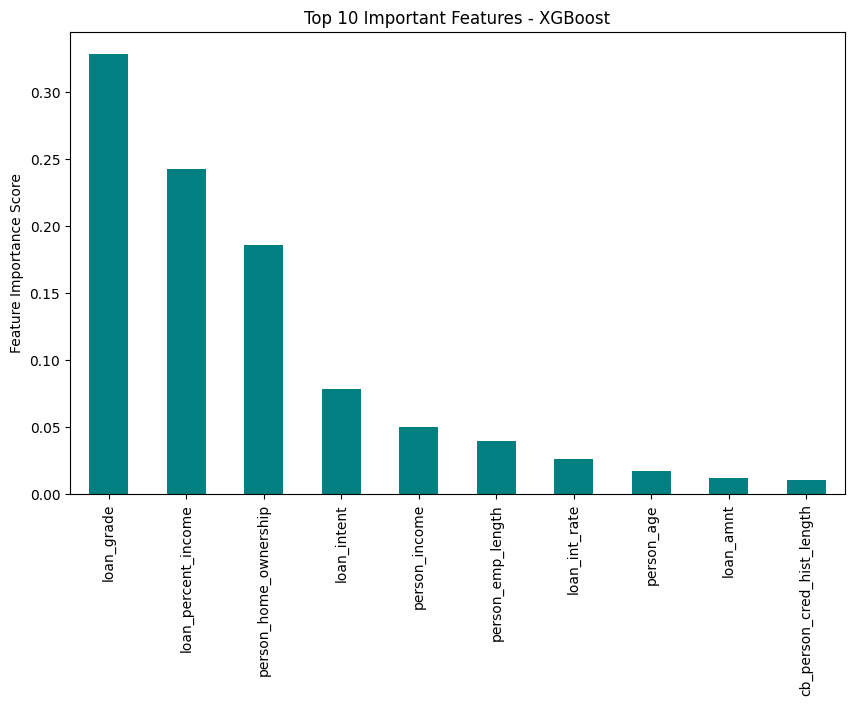

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://docs.google.com/spreadsheets/d/1NXbzYs9cPhOhwo_PyZQbnt7ux0EMJkz3/export?format=csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
display(df.head())

print("Missing values per column:\n", df.isnull().sum())
df = df.dropna()

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

X = df.drop("loan_status", axis=1)
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_log))
roc_auc_log = roc_auc_score(y_test, y_pred_log)
print("ROC-AUC Score:", roc_auc_log)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:\n")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("ROC-AUC Score:", roc_auc_rf)

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Performance:\n")
print(classification_report(y_test, y_pred_xgb))
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print("ROC-AUC Score:", roc_auc_xgb)

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    "ROC-AUC": [roc_auc_log, roc_auc_rf, roc_auc_xgb]
})

print("Model Performance Comparison:\n")
display(results)

plt.figure(figsize=(8,5))
sns.barplot(data=results, x='Model', y='ROC-AUC', palette='coolwarm')
plt.title("Model Comparison based on ROC-AUC Score")
plt.ylabel("ROC-AUC")
plt.show()

plt.figure(figsize=(10,6))
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_importances.sort_values(ascending=False).head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Important Features - XGBoost")
plt.ylabel("Feature Importance Score")
plt.show()


# **9 Interpretation and Discussion**

The predictive results indicate that:

Logistic Regression provides a baseline accuracy and interpretability.

Random Forest enhances predictive performance by capturing non-linear patterns.

XGBoost demonstrates the highest overall accuracy and ROC-AUC, confirming its suitability for credit risk prediction.

Key influential features identified by the XGBoost model include:

*   loan_percent_income
*   person_income
*   loan_int_rate
*   cb_person_default_on_file
*   loan_int_rate

These features represent the applicant's financial health, loan characteristics, and credit history, which significantly influence default probability.

# **10 Conclusion**

Through comparative analysis, the XGBoost model emerged as the most accurate and reliable classifier for credit risk prediction, achieving the highest ROC-AUC score.
This predictive approach allows financial institutions to automate credit risk evaluation, enhance decision-making, and minimize default losses.